### AIN429 Data Mining Laboratory
Name: Sare Naz
Surname: Ersoy
Number: 21992957

### Aim of the Experiment

In this assignment, we will focus on clustering , which is a method of unsupervised
learning and is a common technique for statistical data analysis used in many fields. It
is a way of grouping the data points into different clusters, consisting of similar data
points. You are required to implement the 3 different clustering algorithms. The
assignment should be implemented as a single Jupyter Notebook. Your notebook
should be clearly documented, using comments and Markdown cells to explain the
code and results. At the end of this exercise, you will become familiar with clustering
methods using Python libraries.

### Clustering

It is basically a type of unsupervised learning method. An unsupervised learning
method is a method in which we draw references from datasets consisting of input
data without labeled responses. Generally, it is used as a process to find meaningful
structure, explanatory underlying processes, generative features, and groupings
inherent in a set of examples. Clustering is the task of dividing the population or data
points into a number of groups such that data points in the same groups are more
similar to other data points in the same group and dissimilar to the data points in other
groups.

The clustering technique can be widely used in various tasks. Some most common
techniques:

##### ● Market Segmentation
##### ● Statistical data analysis
##### ● Social network analysis
##### ● Image segmentation
##### ● Anomaly detection, etc.
Types of clustering algorithms
##### ● Connectivity models: 
As the name suggests, these models are based on the
notion that the data points closer in data space exhibit more similarity to each
other than the data points lying farther away. Examples of these models are
hierarchical clustering algorithms and its variants.


##### ● Centroid models: 
These are iterative clustering algorithms in which the notion
of similarity is derived by the closeness of a data point to the centroid of the
clusters. K-Means clustering algorithm is a popular algorithm that falls into
this category.
##### ● Distribution models: 
These clustering models are based on the notion of how
probable is it that all data points in the cluster belong to the same distribution.
A popular example of these models is the Expectation-maximization algorithm
which uses multivariate normal distributions.
##### ● Density Models: 
These models search the data space for areas of varied
density of data points in the data space Popular examples of density models
are DBSCAN and OPTICS.
##### Experiment

1. Download the dataset. The dataset will be shared on the Piazza group.
2. Perform preprocessing steps that may be necessary to clean or filter the data.
3. Analyze the dataset using tables and graphs.
4. Clearly explain analysis results.
5. Apply the 3 different clustering algorithms of your choice.
6. Apply the normalization and feature selection methods and explain its effect
on clustering.
7. Compare the performance of clustering algorithms using tables and graphs.
8. Summarize and interpret your results.
9. You should submit your codes and report as a single Jupyter notebook.

### Data Reading and Preprocessing
Overview: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.


Objective: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set(style="white")
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv', delimiter=";", decimal=",")

In [3]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [4]:
df.shape
# 846 rows, 18 columns

(846, 18)

In [5]:
#Checking a dataset sample

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.options.display.float_format="{:,.2f}".format
df.sample(n=10, random_state=0)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
506,101,51.00,112.00,201.00,59.00,11,214.00,32.00,24.00,162,223.00,667.00,194.00,65.00,0.00,36.00,190.00,206
222,100,50.00,81.00,197.00,NaN,6,186.00,34.00,22.00,158,206.00,531.00,198.00,74.00,NaN,1.00,197.00,198
612,80,34.00,42.00,110.00,57.00,3,114.00,59.00,17.00,119,131.00,191.00,121.00,87.00,4.00,7.00,179.00,183
730,101,55.00,107.00,200.00,61.00,11,225.00,30.00,25.00,178,228.00,730.00,204.00,74.00,8.00,35.00,187.00,201
661,110,46.00,100.00,197.00,61.00,9,193.00,34.00,22.00,149,209.00,561.00,160.00,65.00,11.00,7.00,194.00,203
577,99,54.00,100.00,199.00,62.00,9,200.00,33.00,23.00,166,222.00,600.00,241.00,70.00,2.00,7.00,189.00,198
31,88,42.00,77.00,151.00,58.00,8,140.00,47.00,18.00,142,165.00,293.00,158.00,64.00,10.00,11.00,198.00,205
145,103,54.00,107.00,218.00,64.00,12,222.00,30.00,25.00,174,221.00,728.00,199.00,67.00,0.00,18.00,189.00,200
794,87,41.00,76.00,165.00,67.00,7,148.00,45.00,19.00,140,171.00,327.00,152.00,72.00,7.00,13.00,188.00,195
416,89,44.00,70.00,158.00,64.00,6,141.00,47.00,18.00,143,164.00,299.00,173.00,66.00,9.00,11.00,193.00,199


In [6]:
# Check data type and other important information of each column
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [7]:
#Checking the existence of zeros in rows

#(df==0).sum(axis=0).to_excel("zeros_per_feature.xlsx")
(df==0).sum(axis=0)

compactness                     0
circularity                     0
distance_circularity            0
radius_ratio                    0
pr.axis_aspect_ratio            0
max.length_aspect_ratio         0
scatter_ratio                   0
elongatedness                   0
pr.axis_rectangularity          0
max.length_rectangularity       0
scaled_variance                 0
scaled_variance.1               0
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1     0
skewness_about                 77
skewness_about.1               30
skewness_about.2                0
hollows_ratio                   0
dtype: int64

In [8]:
#Checking the existence of duplicated rows

df.duplicated().sum()

0

All fields are numeric, no need to convert data types.

There are missing values in many columns like circularity, distance circularity, radius ratio .. etc.
Replace all rows with NA by their means, so we are able to keep relevant info in all columns

In [9]:
df.fillna(df.mean(), inplace=True)

#df.to_excel("df_cleaned.xlsx")

<AxesSubplot:xlabel='compactness'>

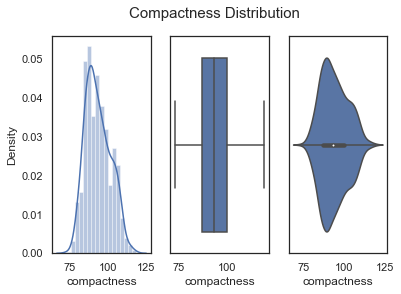

In [10]:
#plotting Numerical Variables
fig, ax = plt.subplots(1,3)
fig.suptitle("Compactness Distribution", fontsize=15)
sns.distplot(df["compactness"], ax=ax[0])
sns.boxplot(df["compactness"], ax=ax[1])
sns.violinplot(df["compactness"], ax=ax[2])

<AxesSubplot:xlabel='circularity'>

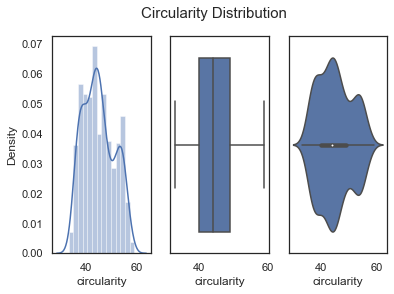

In [11]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Circularity Distribution", fontsize=15)
sns.distplot(df["circularity"], ax=ax[0])
sns.boxplot(df["circularity"], ax=ax[1])
sns.violinplot(df["circularity"], ax=ax[2])

<AxesSubplot:xlabel='distance_circularity'>

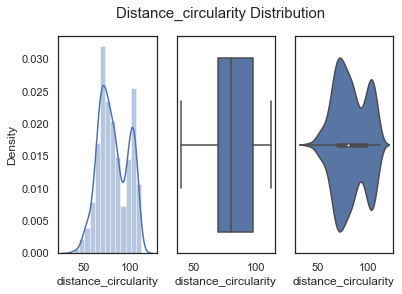

In [12]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Distance_circularity Distribution", fontsize=15)
sns.distplot(df["distance_circularity"], ax=ax[0])
sns.boxplot(df["distance_circularity"], ax=ax[1])
sns.violinplot(df["distance_circularity"], ax=ax[2])

<AxesSubplot:xlabel='radius_ratio'>

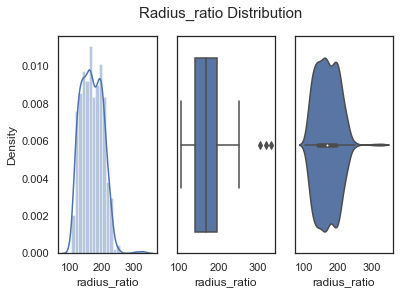

In [13]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Radius_ratio Distribution", fontsize=15)
sns.distplot(df["radius_ratio"], ax=ax[0])
sns.boxplot(df["radius_ratio"], ax=ax[1])
sns.violinplot(df["radius_ratio"], ax=ax[2])

<AxesSubplot:xlabel='pr.axis_aspect_ratio'>

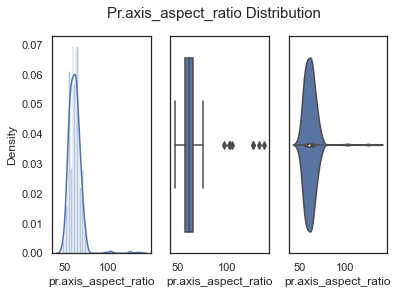

In [14]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Pr.axis_aspect_ratio Distribution", fontsize=15)
sns.distplot(df["pr.axis_aspect_ratio"], ax=ax[0])
sns.boxplot(df["pr.axis_aspect_ratio"], ax=ax[1])
sns.violinplot(df["pr.axis_aspect_ratio"], ax=ax[2])

<AxesSubplot:xlabel='max.length_aspect_ratio'>

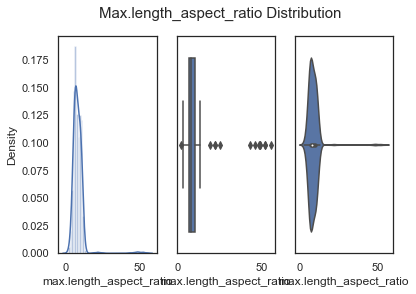

In [15]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Max.length_aspect_ratio Distribution", fontsize=15)
sns.distplot(df["max.length_aspect_ratio"], ax=ax[0])
sns.boxplot(df["max.length_aspect_ratio"], ax=ax[1])
sns.violinplot(df["max.length_aspect_ratio"], ax=ax[2])

<AxesSubplot:xlabel='scatter_ratio'>

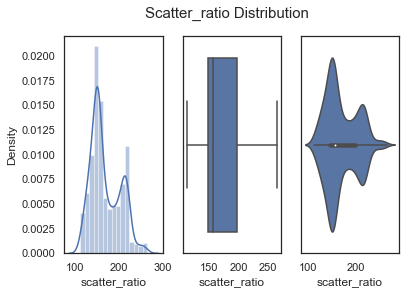

In [16]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Scatter_ratio Distribution", fontsize=15)
sns.distplot(df["scatter_ratio"], ax=ax[0])
sns.boxplot(df["scatter_ratio"], ax=ax[1])
sns.violinplot(df["scatter_ratio"], ax=ax[2])

<AxesSubplot:xlabel='elongatedness'>

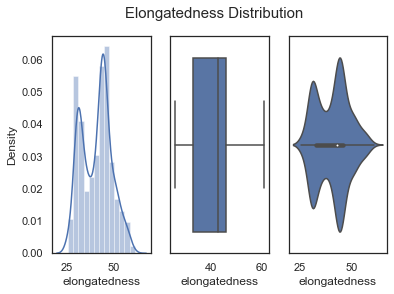

In [17]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Elongatedness Distribution", fontsize=15)
sns.distplot(df["elongatedness"], ax=ax[0])
sns.boxplot(df["elongatedness"], ax=ax[1])
sns.violinplot(df["elongatedness"], ax=ax[2])

<AxesSubplot:xlabel='pr.axis_rectangularity'>

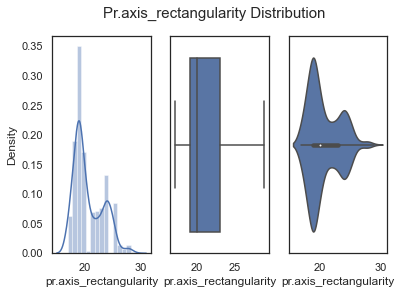

In [18]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Pr.axis_rectangularity Distribution", fontsize=15)
sns.distplot(df["pr.axis_rectangularity"], ax=ax[0])
sns.boxplot(df["pr.axis_rectangularity"], ax=ax[1])
sns.violinplot(df["pr.axis_rectangularity"], ax=ax[2])

<AxesSubplot:xlabel='max.length_rectangularity'>

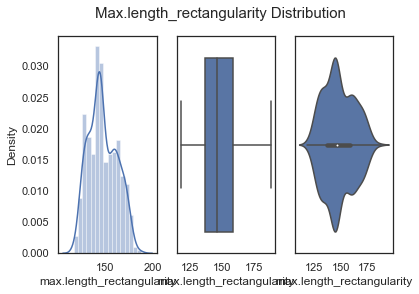

In [19]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Max.length_rectangularity Distribution", fontsize=15)
sns.distplot(df["max.length_rectangularity"], ax=ax[0])
sns.boxplot(df["max.length_rectangularity"], ax=ax[1])
sns.violinplot(df["max.length_rectangularity"], ax=ax[2])

<AxesSubplot:xlabel='scaled_variance'>

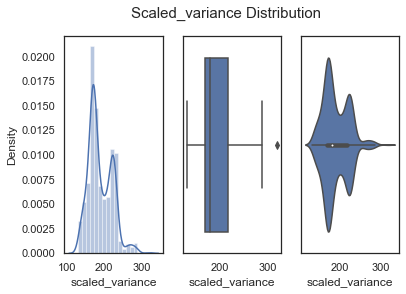

In [20]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Scaled_variance Distribution", fontsize=15)
sns.distplot(df["scaled_variance"], ax=ax[0])
sns.boxplot(df["scaled_variance"], ax=ax[1])
sns.violinplot(df["scaled_variance"], ax=ax[2])

<AxesSubplot:xlabel='scaled_variance.1'>

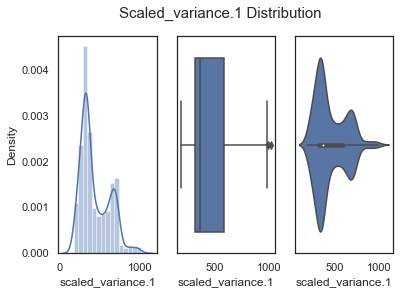

In [21]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Scaled_variance.1 Distribution", fontsize=15)
sns.distplot(df["scaled_variance.1"], ax=ax[0])
sns.boxplot(df["scaled_variance.1"], ax=ax[1])
sns.violinplot(df["scaled_variance.1"], ax=ax[2])

<AxesSubplot:xlabel='scaled_radius_of_gyration'>

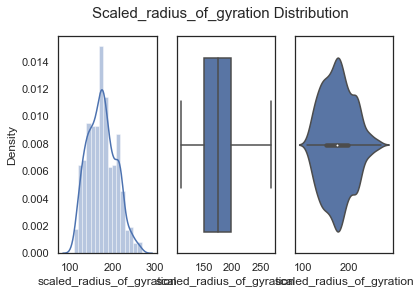

In [22]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Scaled_radius_of_gyration Distribution", fontsize=15)
sns.distplot(df["scaled_radius_of_gyration"], ax=ax[0])
sns.boxplot(df["scaled_radius_of_gyration"], ax=ax[1])
sns.violinplot(df["scaled_radius_of_gyration"], ax=ax[2])

<AxesSubplot:xlabel='scaled_radius_of_gyration.1'>

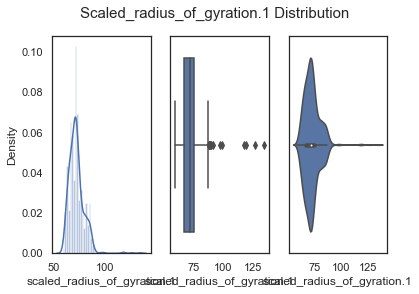

In [23]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Scaled_radius_of_gyration.1 Distribution", fontsize=15)
sns.distplot(df["scaled_radius_of_gyration.1"], ax=ax[0])
sns.boxplot(df["scaled_radius_of_gyration.1"], ax=ax[1])
sns.violinplot(df["scaled_radius_of_gyration.1"], ax=ax[2])

<AxesSubplot:xlabel='skewness_about'>

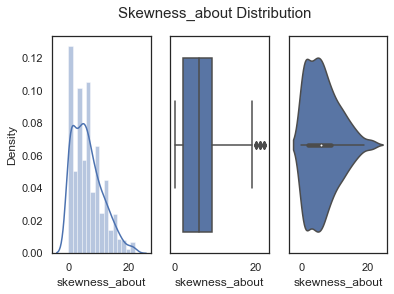

In [24]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Skewness_about Distribution", fontsize=15)
sns.distplot(df["skewness_about"], ax=ax[0])
sns.boxplot(df["skewness_about"], ax=ax[1])
sns.violinplot(df["skewness_about"], ax=ax[2])

<AxesSubplot:xlabel='skewness_about.1'>

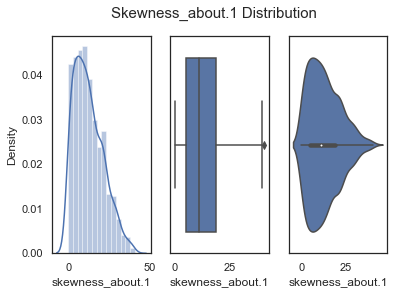

In [25]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Skewness_about.1 Distribution", fontsize=15)
sns.distplot(df["skewness_about.1"], ax=ax[0])
sns.boxplot(df["skewness_about.1"], ax=ax[1])
sns.violinplot(df["skewness_about.1"], ax=ax[2])

<AxesSubplot:xlabel='skewness_about'>

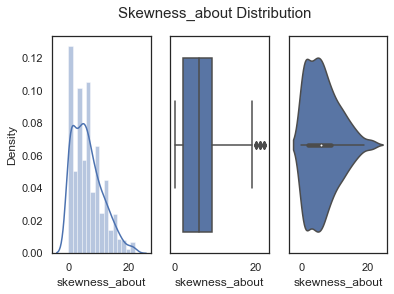

In [26]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Skewness_about Distribution", fontsize=15)
sns.distplot(df["skewness_about"], ax=ax[0])
sns.boxplot(df["skewness_about"], ax=ax[1])
sns.violinplot(df["skewness_about"], ax=ax[2])

<AxesSubplot:xlabel='hollows_ratio'>

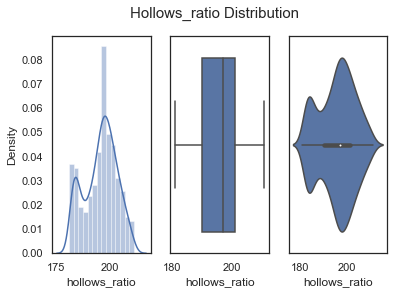

In [27]:
fig, ax = plt.subplots(1,3)
fig.suptitle("Hollows_ratio Distribution", fontsize=15)
sns.distplot(df["hollows_ratio"], ax=ax[0])
sns.boxplot(df["hollows_ratio"], ax=ax[1])
sns.violinplot(df["hollows_ratio"], ax=ax[2])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0, 0.5, 'compactness'),
  Text(0, 1.5, 'circularity'),
  Text(0, 2.5, 'distance_circularity'),
  Text(0, 3.5, 'radius_ratio'),
  Text(0, 4.5, 'pr.axis_aspect_ratio'),
  Text(0, 5.5, 'max.length_aspect_ratio'),
  Text(0, 6.5, 'scatter_ratio'),
  Text(0, 7.5, 'elongatedness'),
  Text(0, 8.5, 'pr.axis_rectangularity'),
  Text(0, 9.5, 'max.length_rectangularity'),
  Text(0, 10.5, 'scaled_variance'),
  Text(0, 11.5, 'scaled_variance.1'),
  Text(0, 12.5, 'scaled_radius_of_gyration'),
  Text(0, 13.5, 'scaled_radius_of_gyration.1'),
  Text(0, 14.5, 'skewness_about'),
  Text(0, 15.5, 'skewness_about.1'),
  Text(0, 16.5, 'skewness_about.2'),
  Text(0, 17.5, 'hollows_ratio')])

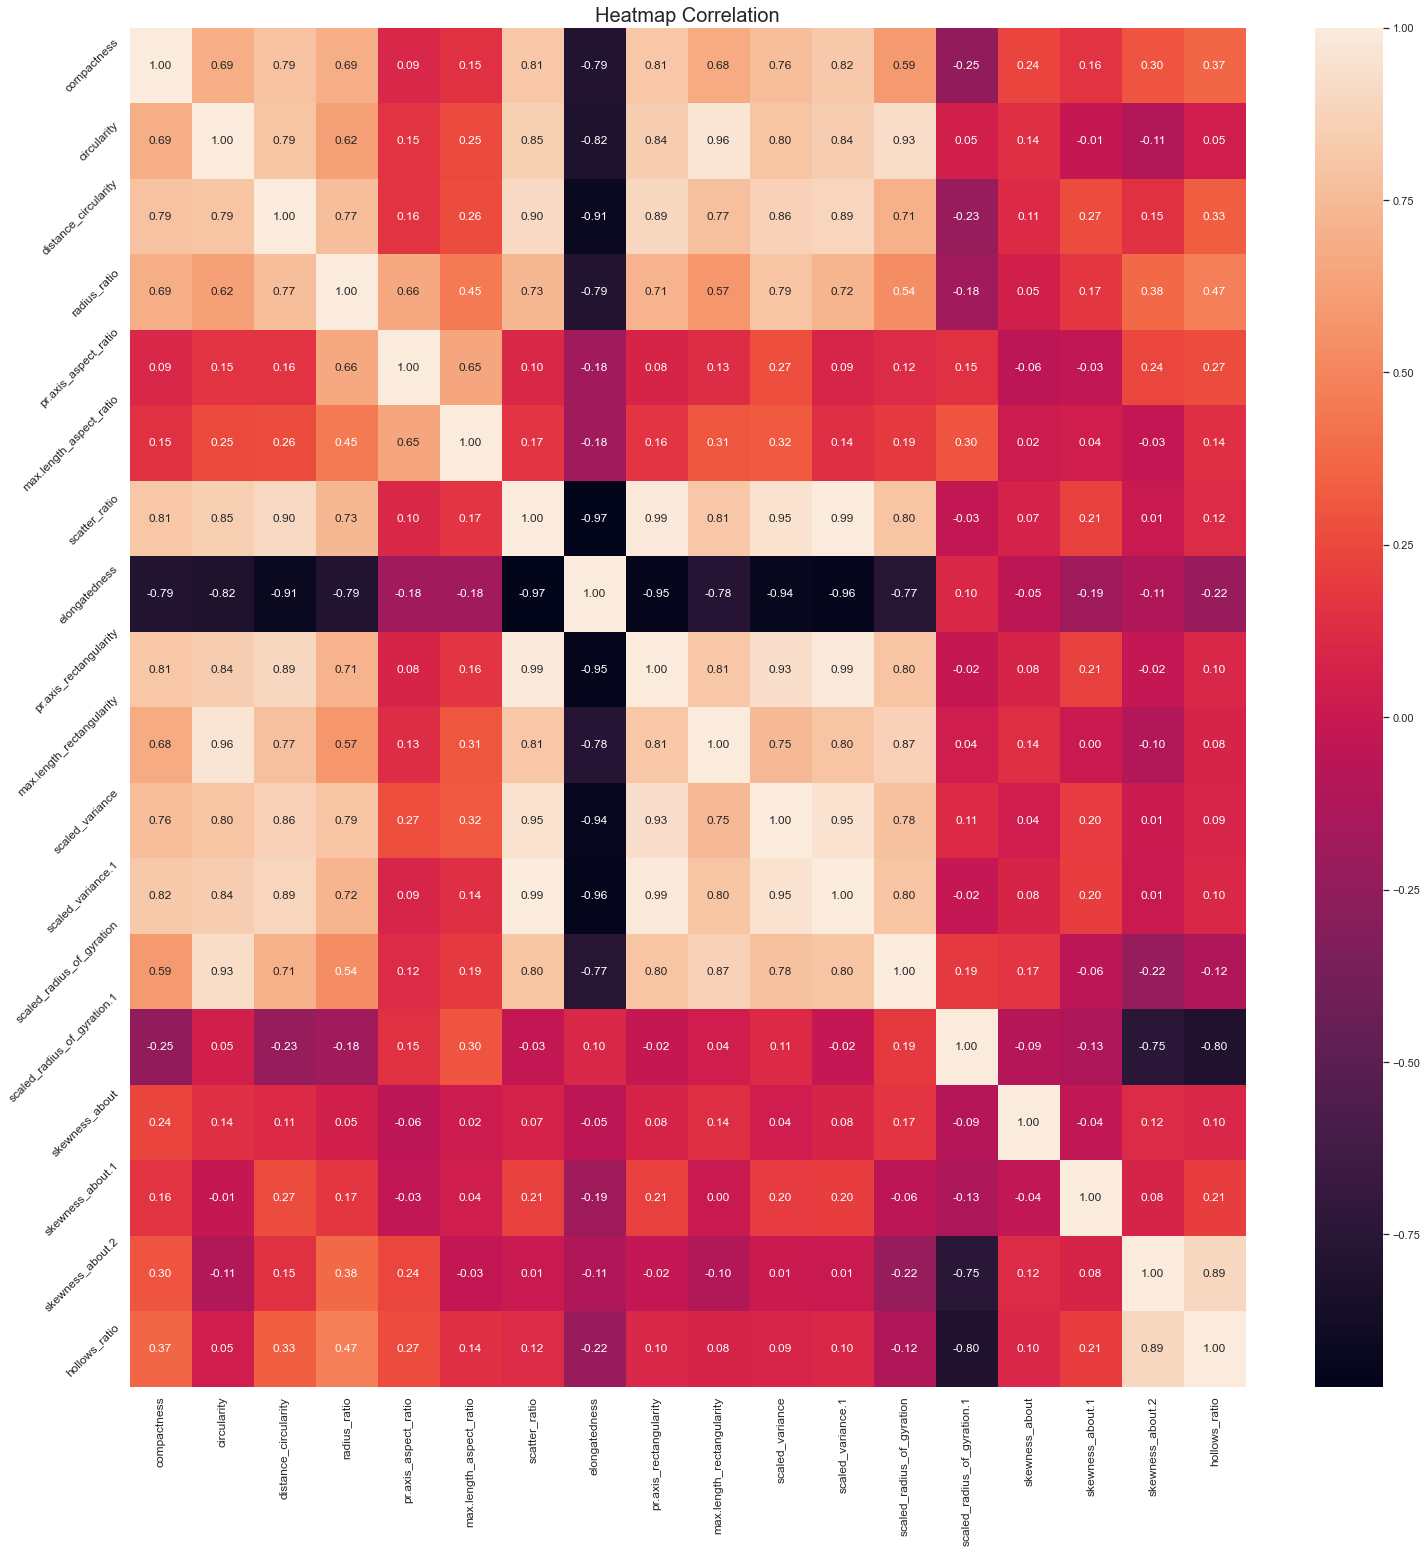

In [28]:
#Plotting a Heatmap
fig, ax = plt.subplots(1, figsize=(25,25))
sns.heatmap(df.corr(), annot=True, fmt=",.2f")
plt.title("Heatmap Correlation", fontsize=20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'compactness'),
  Text(1, 0, 'circularity'),
  Text(2, 0, 'distance_circularity'),
  Text(3, 0, 'radius_ratio'),
  Text(4, 0, 'pr.axis_aspect_ratio'),
  Text(5, 0, 'max.length_aspect_ratio'),
  Text(6, 0, 'scatter_ratio'),
  Text(7, 0, 'elongatedness'),
  Text(8, 0, 'pr.axis_rectangularity'),
  Text(9, 0, 'max.length_rectangularity'),
  Text(10, 0, 'scaled_variance'),
  Text(11, 0, 'scaled_variance.1'),
  Text(12, 0, 'scaled_radius_of_gyration'),
  Text(13, 0, 'scaled_radius_of_gyration.1'),
  Text(14, 0, 'skewness_about'),
  Text(15, 0, 'skewness_about.1'),
  Text(16, 0, 'skewness_about.2'),
  Text(17, 0, 'hollows_ratio')])

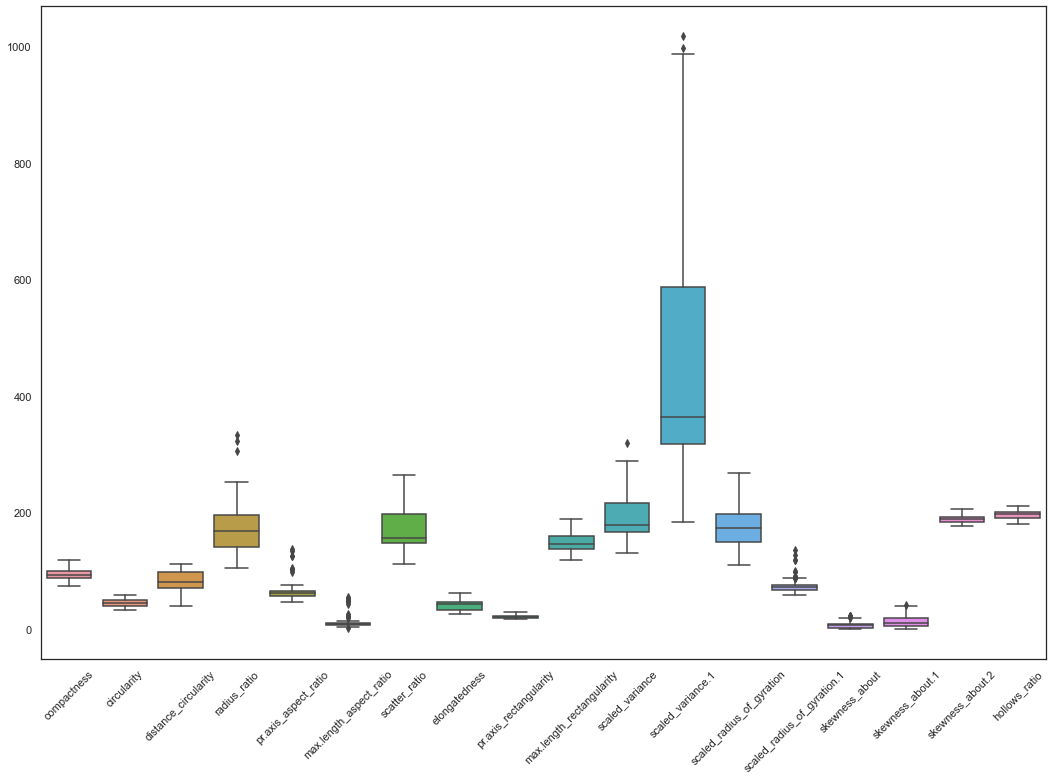

In [29]:
plt.figure(figsize=(18,12))
sns.boxplot(data=df) 
plt.xticks(rotation=45)

Most of the independent features in our dataset have a central tendency around the middle, with a few exceptions that are skewed. There are outliers in certain columns such as radius_ratio, aspect_ratio, max length aspect ratio, and scaled radius of gyration. We should consider whether these attributes have an impact on our analysis during feature engineering, and if so, we should consider ways to handle the outliers. If these attributes do not have an impact on our analysis, we can also consider dropping them before training our model. In this particular dataset, the attributes with outliers have been dropped from the analysis due to high collinearity. To avoid multicollinearity issues, these attributes have been removed in subsequent steps.

In [30]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [31]:
def check_outlier(dataframe, col_name, q1=.25, q3=.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [32]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] <= low_limit) | (dataframe[col_name] >= up_limit))]
    return df_without_outliers

In [33]:
num_cols = df.columns;

In [34]:
num_cols

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [35]:
#Checkin if there is outlier
for col in num_cols:
    print(check_outlier(df,col))

False
False
False
True
True
True
False
False
False
False
True
True
False
True
True
True
False
False


In [36]:
for col in num_cols:
    df = remove_outlier(df,col)

In [37]:
#checking if there is outlier after outlier removing
for col in num_cols:
    print(check_outlier(df,col))

False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False


In [38]:
df.shape

(801, 18)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'compactness'),
  Text(1, 0, 'circularity'),
  Text(2, 0, 'distance_circularity'),
  Text(3, 0, 'radius_ratio'),
  Text(4, 0, 'pr.axis_aspect_ratio'),
  Text(5, 0, 'max.length_aspect_ratio'),
  Text(6, 0, 'scatter_ratio'),
  Text(7, 0, 'elongatedness'),
  Text(8, 0, 'pr.axis_rectangularity'),
  Text(9, 0, 'max.length_rectangularity'),
  Text(10, 0, 'scaled_variance'),
  Text(11, 0, 'scaled_variance.1'),
  Text(12, 0, 'scaled_radius_of_gyration'),
  Text(13, 0, 'scaled_radius_of_gyration.1'),
  Text(14, 0, 'skewness_about'),
  Text(15, 0, 'skewness_about.1'),
  Text(16, 0, 'skewness_about.2'),
  Text(17, 0, 'hollows_ratio')])

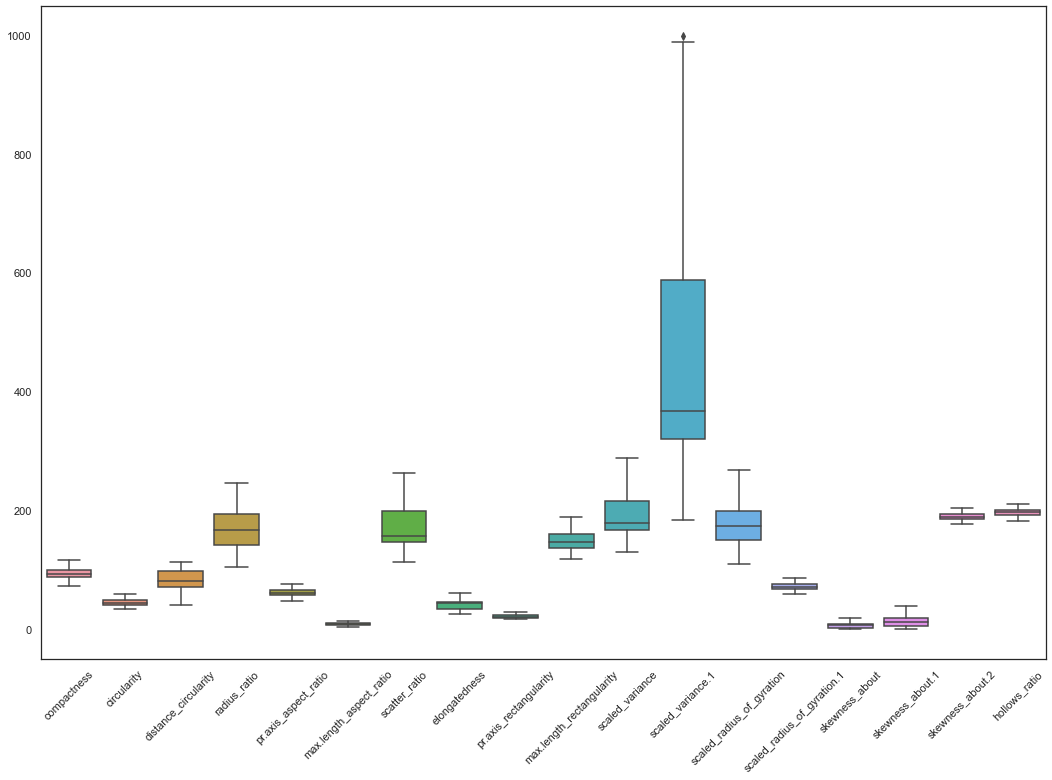

In [39]:
plt.figure(figsize=(18,12))
sns.boxplot(data=df) 
plt.xticks(rotation=45)

In [40]:
#After dropping the outliers, there is 800 data remaining.

In [43]:
#sns.pairplot(df)

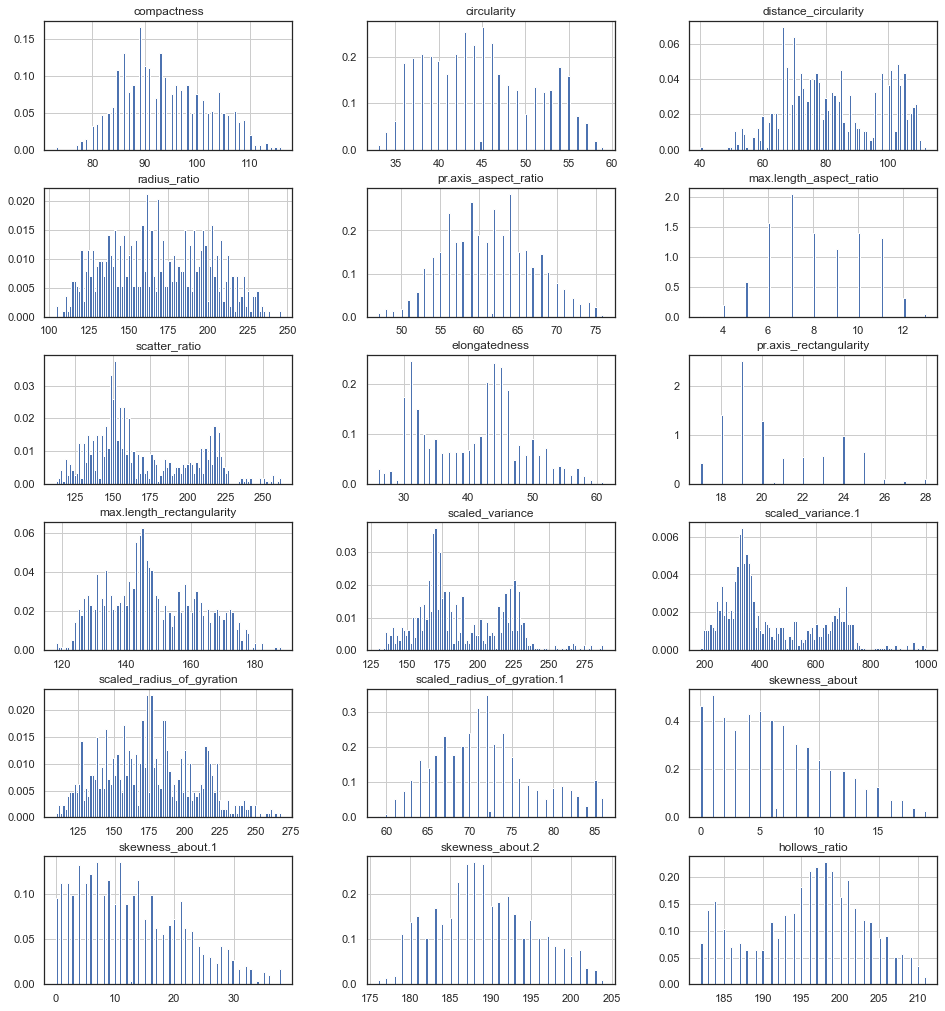

In [44]:
columns=list(df)
df[columns].hist(stacked=True,density=True, bins=100, figsize=(16,30), layout=(10,3));

The histogram suggests that most of the independent variables in our dataset are normally distributed, with some having multiple gaussian distributions. This information can be useful in choosing appropriate machine learning models for our analysis, as many models assume a normal distribution of the input data.

## Clustering 

### K Means

In [62]:
from sklearn.cluster import KMeans

In [63]:
#ELBOW METHOD TO FİND OPTİMAL K

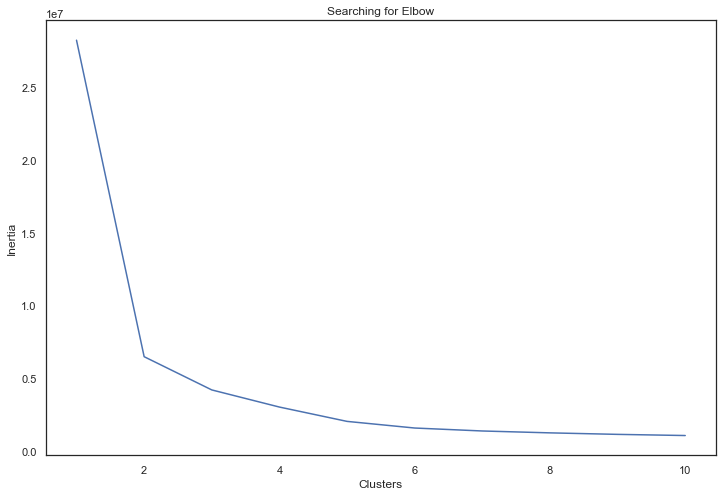

In [64]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow


plt.show()

We can see from Elbow Plot, Optimal Number of Clusters is 3.

In [73]:
range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df)  
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 3 The average silhouette_score is : 0.5349972029845891
For n_clusters = 4 The average silhouette_score is : 0.4513233220997718
For n_clusters = 5 The average silhouette_score is : 0.4748076538860383
For n_clusters = 6 The average silhouette_score is : 0.44568707744684105


You can see it from here as well.

In [69]:
# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(df)

# Predict the cluster labels for each sample
predictions = kmeans.predict(df)

df is a 2D array of the data that you want to cluster. The n_clusters parameter specifies the number of clusters that the model should try to create. The fit method trains the model on the data, and the predict method assigns each sample to a cluster based on the trained model.

Once the model is trained and the predictions are made, you can evaluate the quality of the clustering by using a variety of evaluation metrics, such as the silhouette score or the adjusted Rand index.

It's important to note that k-means clustering requires you to specify the number of clusters in advance. Choosing the right number of clusters can be challenging, and it may require some trial and error to find the best value.

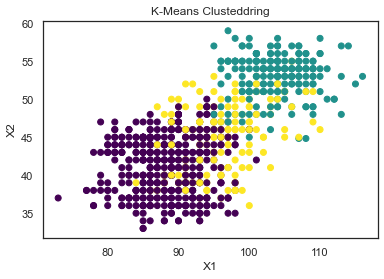

In [70]:

# Create a scatter plot of the data, coloring each point according to its cluster label
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=predictions, cmap='viridis')

# Add axis labels and a title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-Means Clusteddring')
# Show the plot
plt.show()

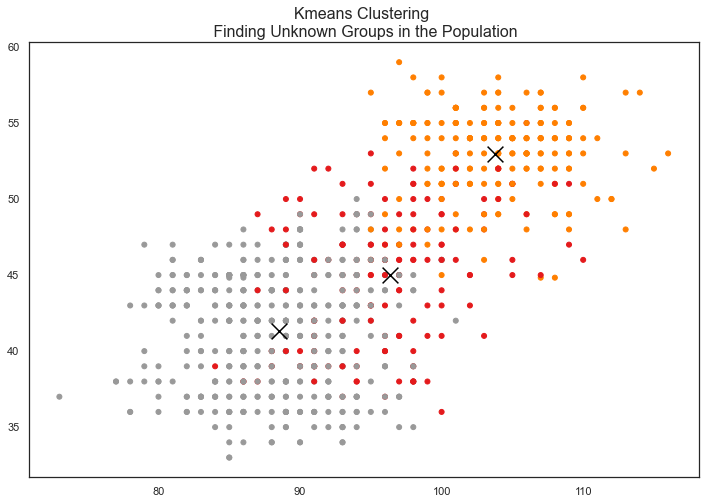

In [71]:
fig = plt.figure(figsize=(12,8))

plt.scatter(df.values[:,0], df.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

For n_clusters = 3 The average silhouette_score is : 0.5349972029845891
For n_clusters = 4 The average silhouette_score is : 0.4513233220997718
For n_clusters = 5 The average silhouette_score is : 0.4748076538860383
For n_clusters = 6 The average silhouette_score is : 0.44568707744684105


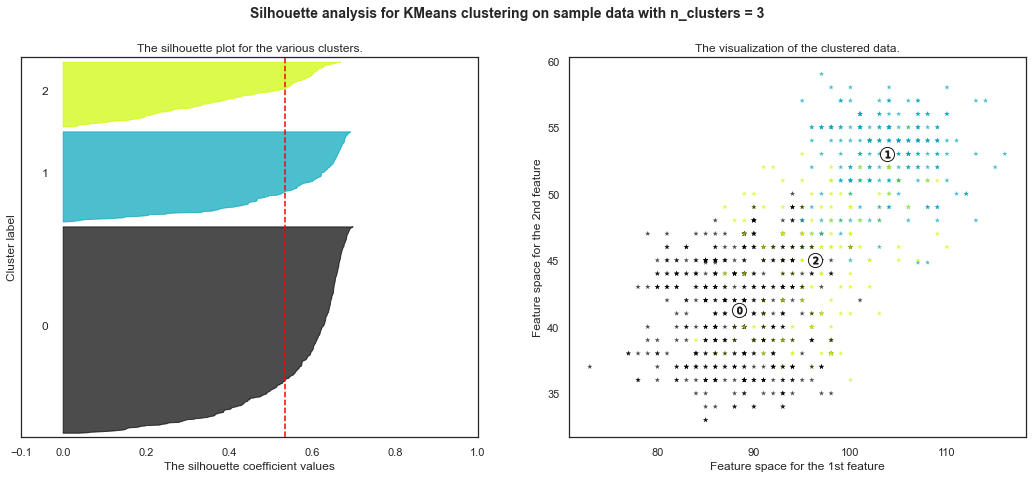

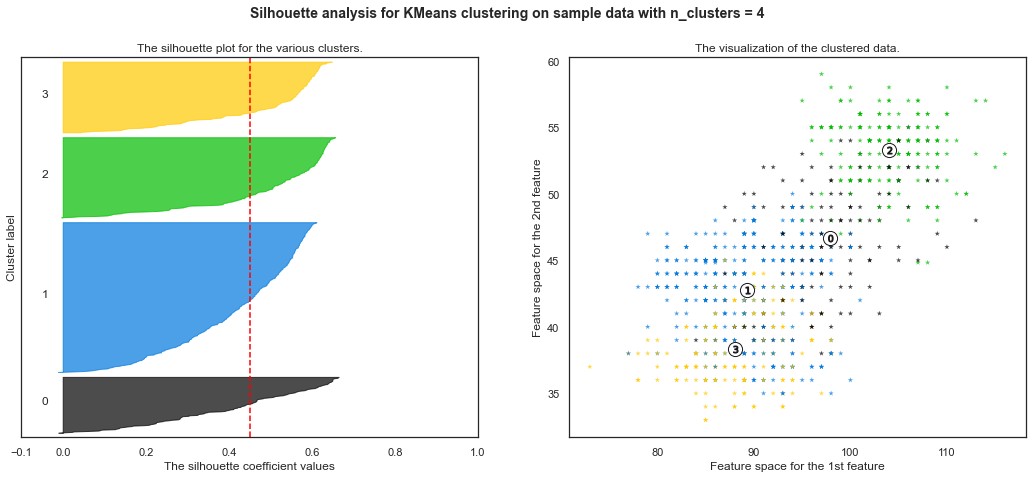

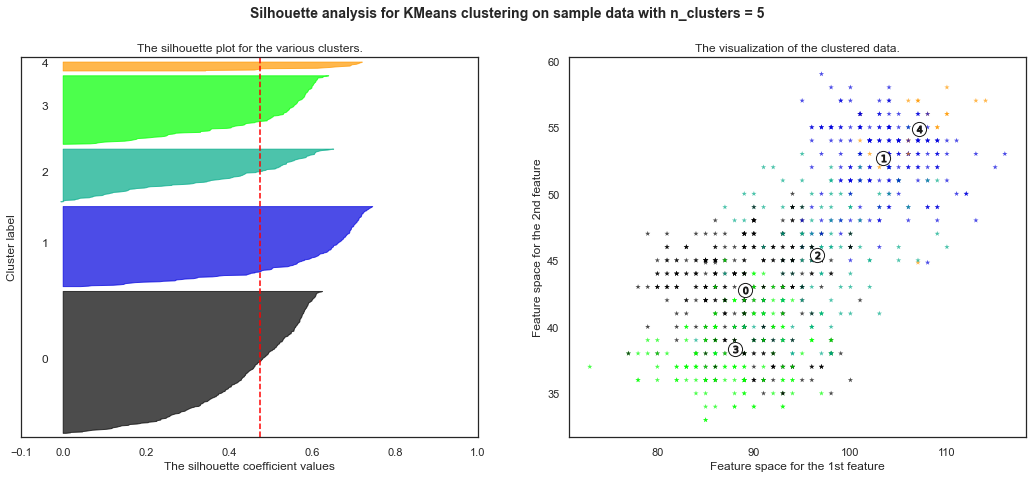

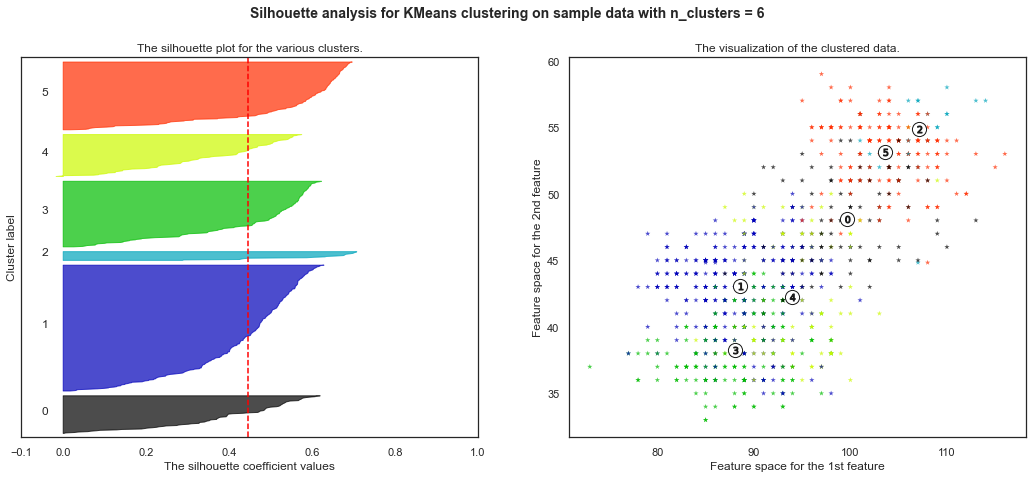

In [72]:

range_n_clusters = [3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='*', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold');

plt.show()

### Agglomerative Clustering
Agglomerative clustering is a hierarchical clustering algorithm that starts with each sample as a separate cluster and then merges the closest pairs of clusters until a desired number of clusters is reached.

In [78]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df)  
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 3 The average silhouette_score is : 0.5469677594687824
For n_clusters = 4 The average silhouette_score is : 0.4331279609369003
For n_clusters = 5 The average silhouette_score is : 0.449818030185226
For n_clusters = 6 The average silhouette_score is : 0.40157466043584755


I picked the k=3 again

In [79]:

# Create an AgglomerativeClustering model with 3 clusters
agg_cluster =  AgglomerativeClustering(n_clusters=3, linkage='average').fit(df)

# Fit the model to the data
predictions = agg_cluster.fit_predict(df)


linked = linkage(agg_cluster.children_, 'single')

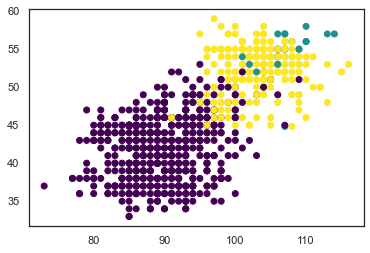

In [80]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=predictions,cmap='viridis')

# Show the plot
plt.show()


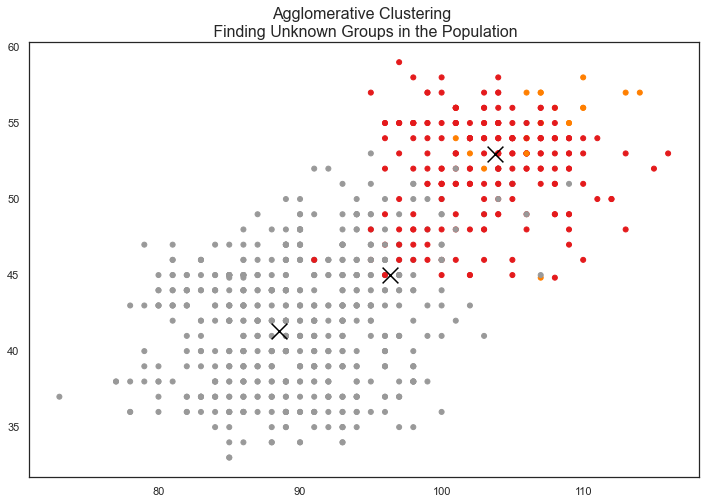

In [81]:
fig = plt.figure(figsize=(12,8))

plt.scatter(df.values[:,0], df.values[:,1], c=predictions, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Agglomerative Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

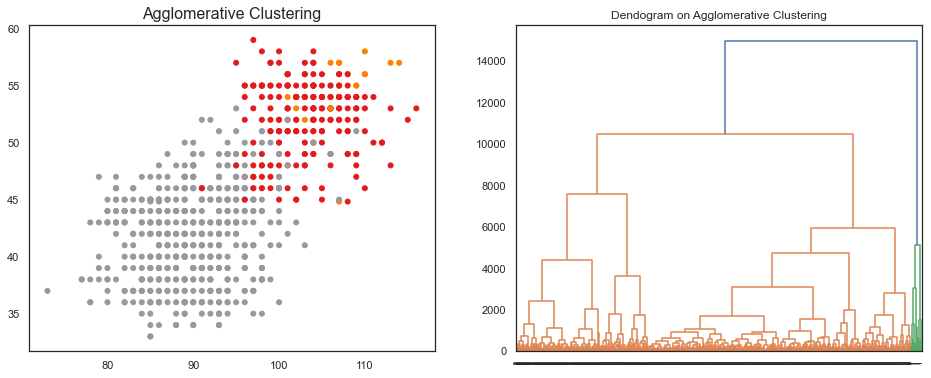

In [82]:

from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))
dist = distance_matrix(df, df)
Z = hierarchy.linkage(dist, 'complete')
ax1.scatter(df.values[:,0], df.values[:,1], c=agg_cluster.labels_, cmap="Set1_r", s=25)
ax1.set_title("Agglomerative Clustering", fontsize=16)

dendrogram(Z,  
            orientation='top',
            labels=agg_cluster.labels_,
            distance_sort='descending',
            show_leaf_counts=False,
          ax=ax2)

ax2.set_title("Dendogram on Agglomerative Clustering")

plt.show()

### Mean Shift Algorithm

MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

In [83]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(df, quantile=0.1)
ms = MeanShift().fit(df)
predictions = ms.fit_predict(df)

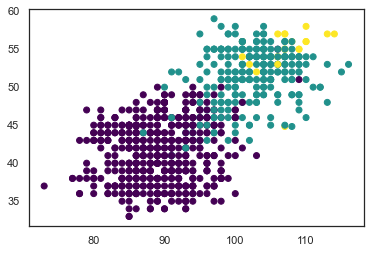

In [84]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=predictions,cmap='viridis')

# Show the plot
plt.show()

In [86]:
cluster_labels = MeanShift().fit(df) 
predictions = ms.fit_predict(df)
silhouette_avg = silhouette_score(df, predictions)
print("The silhouette_score is :", silhouette_avg)

The silhouette_score is : 0.6455214112070543


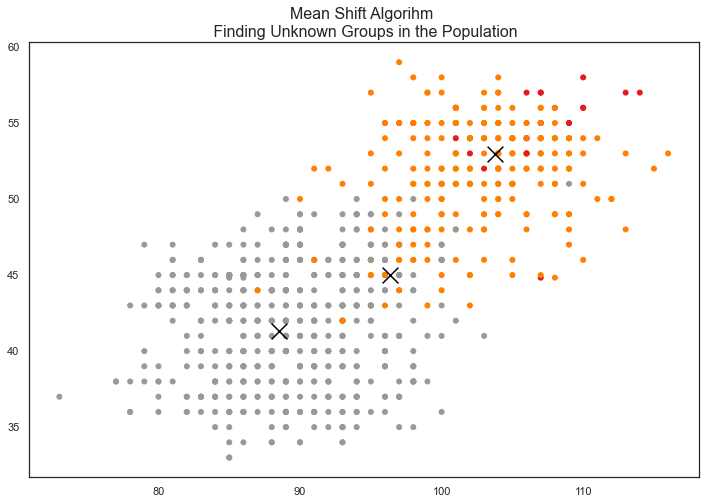

In [87]:
fig = plt.figure(figsize=(12,8))

plt.scatter(df.values[:,0], df.values[:,1], c=predictions, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Mean Shift Algorihm \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

### FEATURE SELECTION

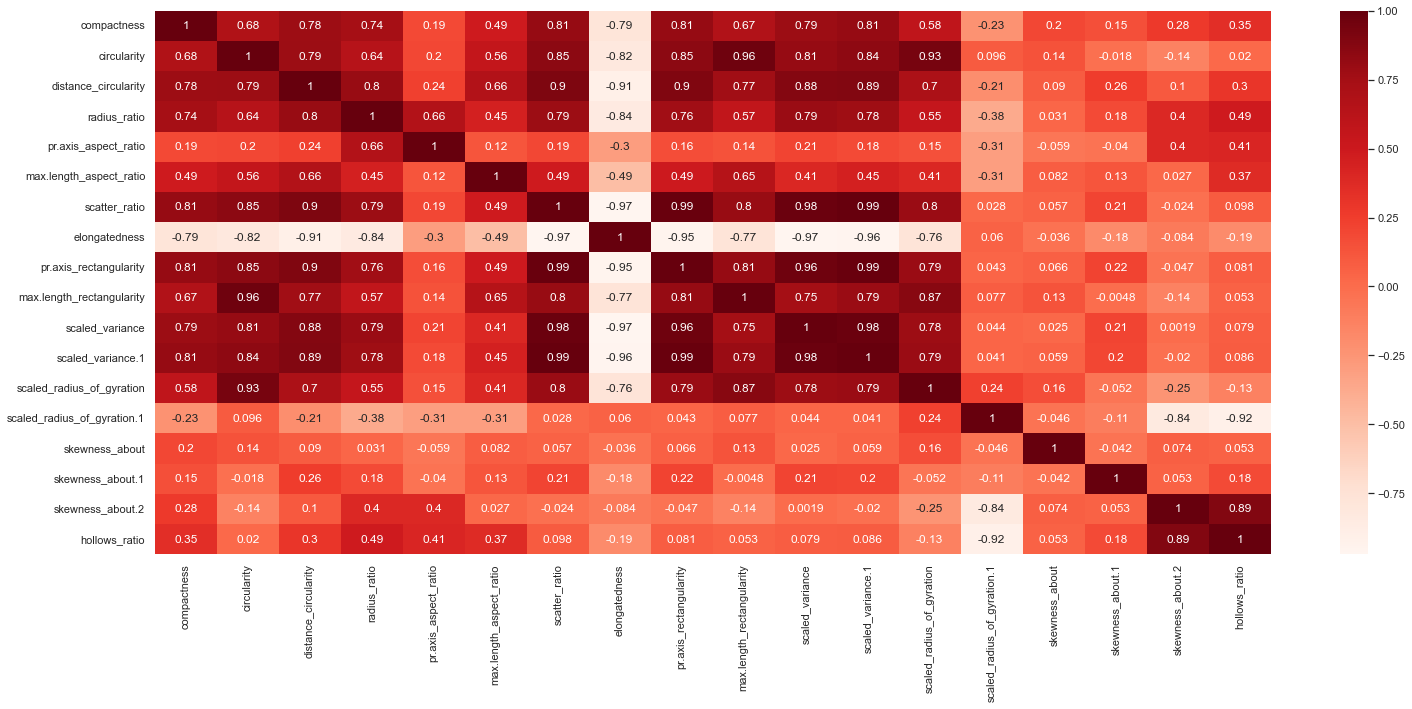

In [88]:
#Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [89]:
#Correlation with compactness variable
cor_target = abs(cor["compactness"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.8]
relevant_features

compactness              1.00
scatter_ratio            0.81
pr.axis_rectangularity   0.81
scaled_variance.1        0.81
Name: compactness, dtype: float64

In [90]:
X = df.drop(["compactness","scatter_ratio", "pr.axis_rectangularity", "scaled_variance.1"],axis=1)   #Feature Matrix

In [91]:
X

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,elongatedness,max.length_rectangularity,scaled_variance,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,48.00,83.00,178.00,72.00,10,42.00,159,176.00,184.00,70.00,6.00,16.00,187.00,197
1,41.00,84.00,141.00,57.00,9,45.00,143,170.00,158.00,72.00,9.00,14.00,189.00,199
2,50.00,106.00,209.00,66.00,10,32.00,158,223.00,220.00,73.00,14.00,9.00,188.00,196
3,41.00,82.00,159.00,63.00,9,46.00,143,160.00,127.00,63.00,6.00,10.00,199.00,207
5,44.83,106.00,172.00,50.00,6,26.00,169,280.00,264.00,85.00,5.00,9.00,181.00,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,39.00,87.00,183.00,64.00,8,40.00,134,200.00,149.00,72.00,7.00,25.00,188.00,195
842,46.00,84.00,163.00,66.00,11,43.00,159,173.00,176.00,72.00,1.00,20.00,186.00,197
843,54.00,101.00,222.00,67.00,12,30.00,173,228.00,200.00,70.00,3.00,4.00,187.00,201
844,36.00,78.00,146.00,58.00,7,50.00,124,155.00,148.00,66.00,0.00,25.00,190.00,195


For n_clusters = 3 The average silhouette_score is : 0.3304247092674631
For n_clusters = 4 The average silhouette_score is : 0.34404984403437633
For n_clusters = 5 The average silhouette_score is : 0.2926641939695717
For n_clusters = 6 The average silhouette_score is : 0.2837075928907347


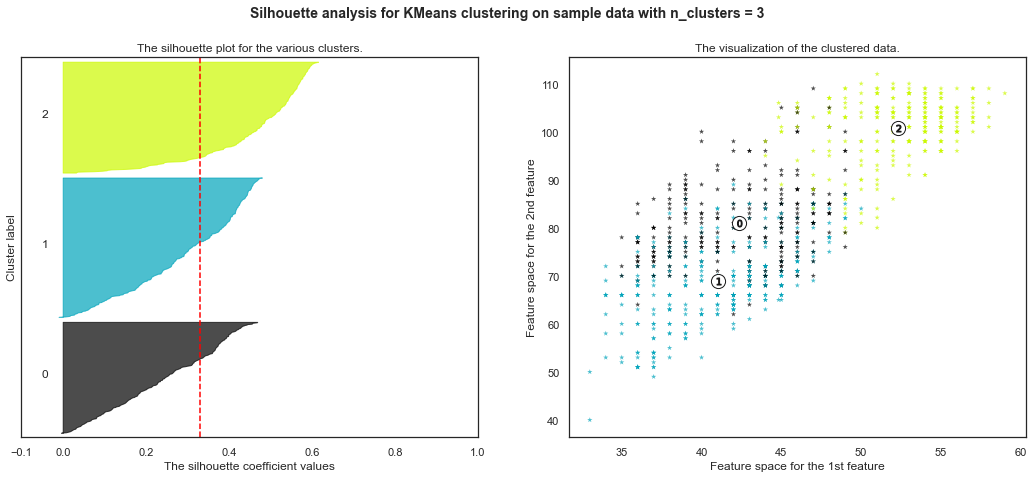

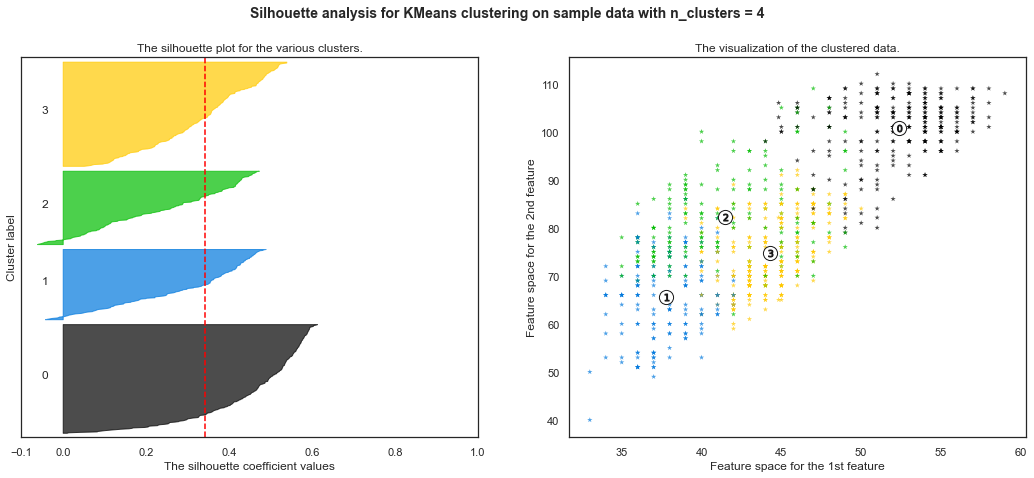

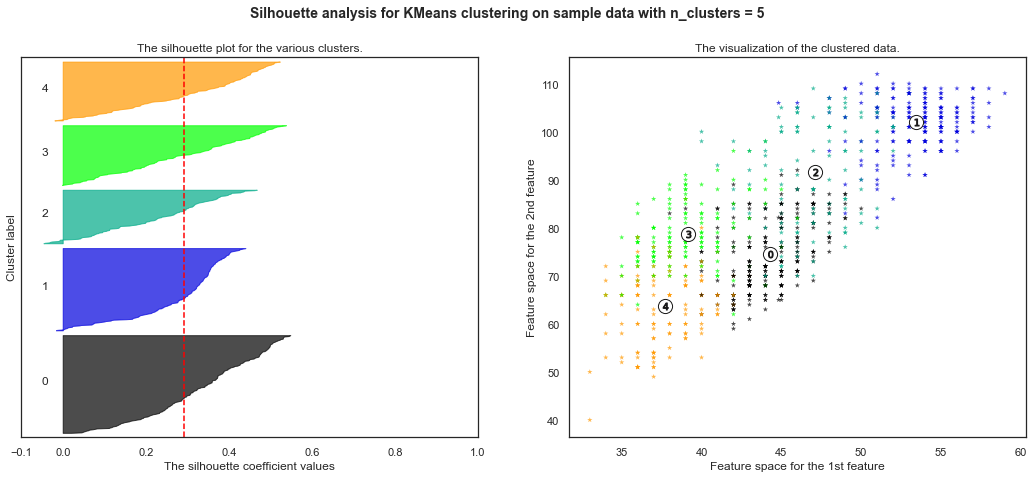

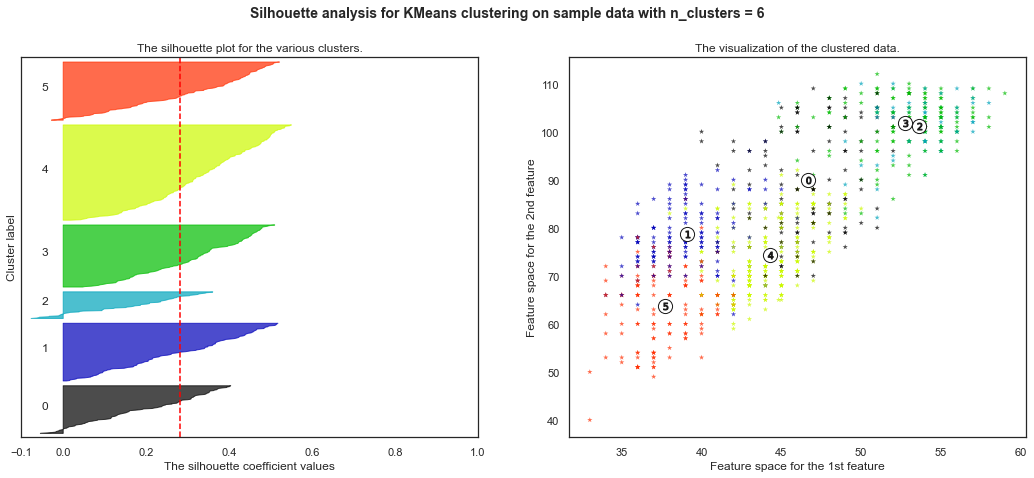

In [92]:
range_n_clusters = [3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='*', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold');

plt.show()

In [93]:
#After I dropped the highly corralated columns, I saw that the silhouette score is reduced because the clustering algorithms
#find clusters according to their relevance. If we drop the relevants, it can't find properly.

In [94]:
# I just wanted the dropp unrelevant columns just for to be sure.

In [95]:
#Correlation with compactness variable
cor_target = abs(cor["compactness"])
#Selecting highly correlated features
unrelevant_features = cor_target[cor_target<0.6]
unrelevant_features

pr.axis_aspect_ratio          0.19
max.length_aspect_ratio       0.49
scaled_radius_of_gyration     0.58
scaled_radius_of_gyration.1   0.23
skewness_about                0.20
skewness_about.1              0.15
skewness_about.2              0.28
hollows_ratio                 0.35
Name: compactness, dtype: float64

In [96]:
X = df.drop(["max.length_aspect_ratio","scaled_radius_of_gyration","scaled_radius_of_gyration.1", "pr.axis_aspect_ratio", "skewness_about","skewness_about.1","skewness_about.2","hollows_ratio"],axis=1)   #Feature Matrix

For n_clusters = 3 The average silhouette_score is : 0.5751181065460441
For n_clusters = 4 The average silhouette_score is : 0.501539680840539
For n_clusters = 5 The average silhouette_score is : 0.5291457703041424
For n_clusters = 6 The average silhouette_score is : 0.5093836704806066


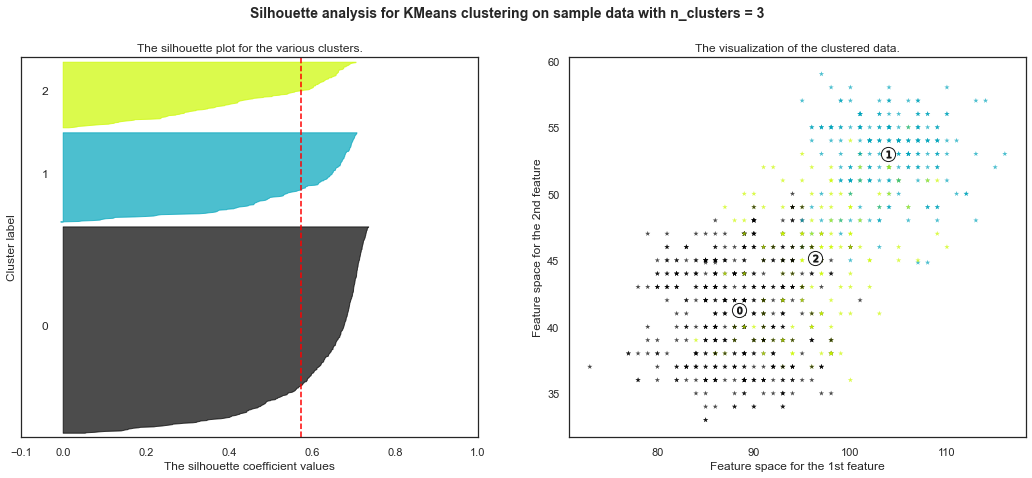

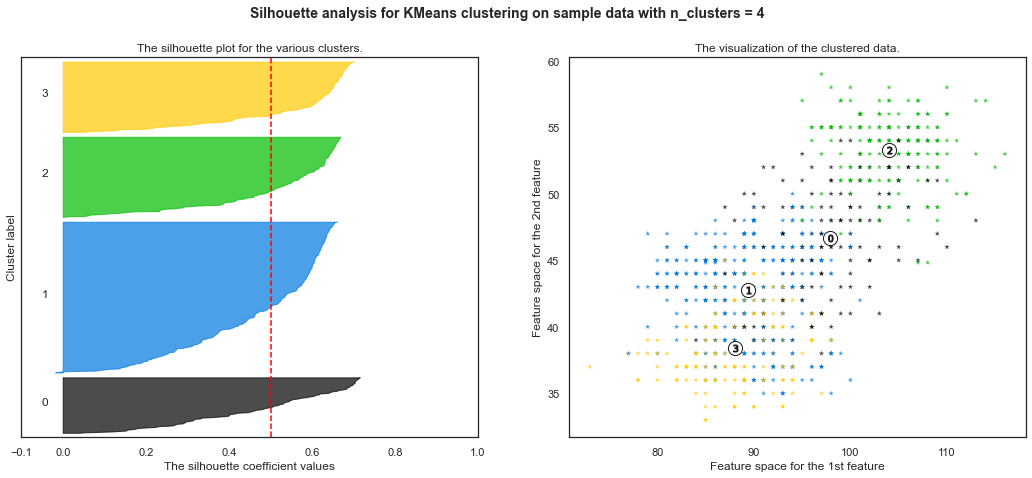

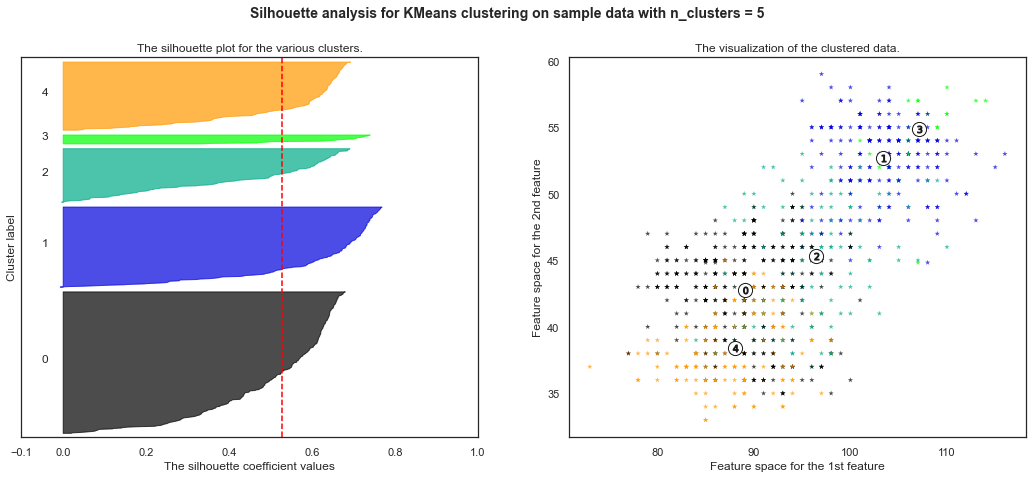

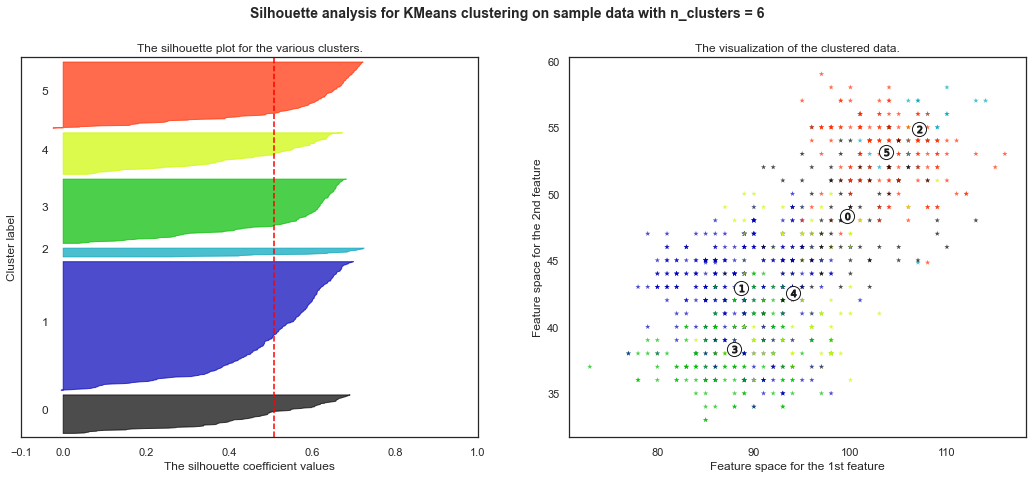

In [97]:
range_n_clusters = [3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='*', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold');

plt.show()

In [68]:
#As you see after the dropping unrelevant columns, silhouette score increased.

### Conclusion

In this project, I made preprocessing on data, visualized it, performed 3 types of clustering algorithms which are K-Means, Agglomerative Clustering and Mean Shift Algorithm. I have applied the elbow method and find that k=3. I did use dimensionality reduction and observed the change of performance as silhouette score. 

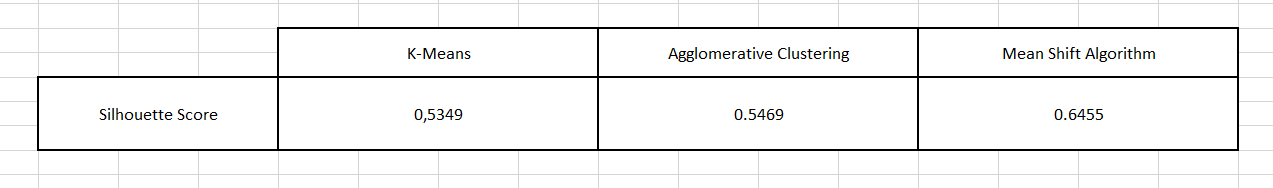

I made a table for silhouette scores of different clustering algorithm. I wanted the add the cluster k-numbers but firstly, I used k=3 for both K-Means and Agglomerative Clustering Algorithms and secondly the Mean Shift Algorithm does not use k for clustering. 